In [29]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [35]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [53]:
original= pd.DataFrame(iris.data, columns=iris.feature_names)
original['target'] = pd.DataFrame(iris.target)

In [54]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [56]:
original.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [57]:
original.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


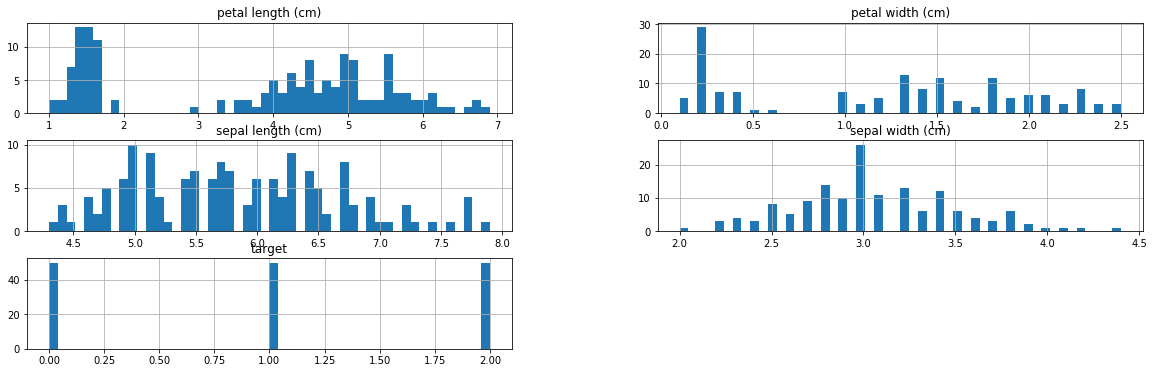

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

original.hist(bins = 50, figsize = (20,6))
plt.show()

In [60]:
corr_matrix = original.corr()

In [61]:
corr_matrix["target"].sort_values(ascending = False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A4F4A66C8>,
      dtype=object)

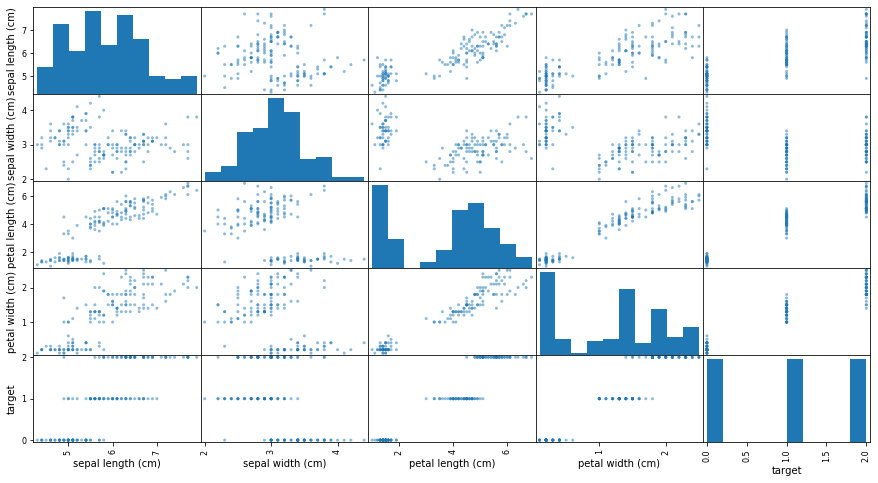

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(original, figsize = (15,8))

In [63]:
import numpy as np
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [66]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [67]:
original_with_id = original.reset_index()
train_set, test_set = split_train_test_by_id(original_with_id, 0.2, "index")

In [68]:
len(train_set)

118

In [69]:
len(test_set)

32

In [72]:
test_set.head(32)

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
2,2,4.7,3.2,1.3,0.2,0
5,5,5.4,3.9,1.7,0.4,0
12,12,4.8,3.0,1.4,0.1,0
16,16,5.4,3.9,1.3,0.4,0
23,23,5.1,3.3,1.7,0.5,0
25,25,5.0,3.0,1.6,0.2,0
30,30,4.8,3.1,1.6,0.2,0
35,35,5.0,3.2,1.2,0.2,0
36,36,5.5,3.5,1.3,0.2,0
42,42,4.4,3.2,1.3,0.2,0


In [73]:
test_set["target"].value_counts()

0    12
2    11
1     9
Name: target, dtype: int64

In [74]:
train_set["target"].value_counts()

1    41
2    39
0    38
Name: target, dtype: int64

In [75]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 148
Data columns (total 6 columns):
index                118 non-null int64
sepal length (cm)    118 non-null float64
sepal width (cm)     118 non-null float64
petal length (cm)    118 non-null float64
petal width (cm)     118 non-null float64
target               118 non-null int32
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.0 KB


In [76]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 2 to 149
Data columns (total 6 columns):
index                32 non-null int64
sepal length (cm)    32 non-null float64
sepal width (cm)     32 non-null float64
petal length (cm)    32 non-null float64
petal width (cm)     32 non-null float64
target               32 non-null int32
dtypes: float64(4), int32(1), int64(1)
memory usage: 1.6 KB


In [77]:
train_set["petal width (cm)"].value_counts()

0.2    22
1.3    11
1.5    10
1.8     9
1.0     7
0.3     6
2.1     6
1.4     6
2.3     6
2.0     5
0.4     5
1.2     5
0.1     4
1.6     3
1.9     3
2.2     3
2.4     3
1.7     1
2.5     1
1.1     1
0.6     1
Name: petal width (cm), dtype: int64

In [80]:
X_train = train_set.drop("target", axis = 1)
y_train = train_set["target"].copy()

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 148
Data columns (total 5 columns):
index                118 non-null int64
sepal length (cm)    118 non-null float64
sepal width (cm)     118 non-null float64
petal length (cm)    118 non-null float64
petal width (cm)     118 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.5 KB


In [82]:
y_train

0      0
1      0
3      0
4      0
6      0
      ..
143    2
144    2
145    2
147    2
148    2
Name: target, Length: 118, dtype: int32

### train SVC

In [83]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
svm_clf.classes_

array([0, 1, 2])

In [85]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 5, scoring = "accuracy")
svm_scores.mean()

0.7040039525691699

### OneVsRest

In [86]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto', kernel='rbf',
                                  max_iter=-1, probability=False,
                                  random_state=42, shrinking=True, tol=0.001,
                                  verbose=False),
                    n_jobs=None)

In [87]:
ovr_clf.classes_

array([0, 1, 2])

In [88]:
ovr_scores = cross_val_score(ovr_clf, X_train, y_train, cv = 5, scoring = "accuracy")
ovr_scores.mean()

0.7120039525691699

### KNeighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [90]:
knn_clf.classes_

array([0, 1, 2])

In [91]:
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv = 5, scoring = "accuracy")
knn_scores.mean()

0.8723636363636365

### Random forest classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

frst_clf = RandomForestClassifier(random_state = 42)
frst_clf.fit(X_train, y_train)

C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [93]:
frst_clf.classes_

array([0, 1, 2])

In [94]:
frst_scores = cross_val_score(frst_clf, X_train, y_train, cv = 5, scoring = "accuracy")
frst_scores.mean()

0.9327272727272726

### Grid Search for KNeighbors 

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.680, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.682, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.680, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [96]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [97]:
grid_search.best_score_

0.8728813559322034

In [98]:
final_model_knn = grid_search.best_estimator_

### Grid Search Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [100, 250, 500]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

forest_grid_clf = RandomForestClassifier(random_state=42)
grid_search_forest = GridSearchCV(forest_grid_clf, param_grid, cv = 5, verbose = 2, n_jobs = -1)
grid_search_forest.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  9.5min finished
C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: Deprec

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa..._state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap'

In [101]:
grid_search_forest.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [102]:
grid_search_forest.best_score_

0.9661016949152542

In [103]:
final_model_forest = grid_search_forest.best_estimator_

### Evaluate your system on Test set

In [104]:
X_test = test_set.drop("target", axis = 1)
y_test = test_set["target"].copy()

In [105]:
y_predictions_knn = final_model_knn.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predictions_knn)

1.0

In [107]:
y_predictions_forest = final_model_forest.predict(X_test)

In [108]:
accuracy_score(y_test, y_predictions_forest)

1.0